In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy 
from tensorflow.keras.activations import sigmoid, relu
from tensorflow.keras.regularizers import l1, l2

In [2]:
customer = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
customer['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
customer['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
def load_data(df):
        #df["Gender_num"] = df["Gender"].map({"Male":1, "Female":0})
        df["gender"] = np.where(df["gender"]=="Male",1,0)
        col_yes = ["Partner","Dependents","PhoneService","OnlineSecurity","PaperlessBilling","Churn"]
        for col in col_yes:
            df[col]= np.where(df[col]=="Yes",1,0)

        #for col in columnas_categoricas:
            #df[col] = np.where(df[col] == df[col].unique()[0], 1, 0)
        col_yes_2 = ["MultipleLines",'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies']
        for col in col_yes_2:    
            df[col] = df[col].map({"No phone service":0, "No":0, "Yes":1,"No internet service":0})
        df = df.drop(["customerID","TotalCharges"],axis=1)

        return df

In [8]:
customer = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer_2 = load_data(customer)
#customer_2.corr()
# Seleccionar solo columnas numéricas
numeric_customer = customer_2.select_dtypes(include=['number'])
correlacion = numeric_customer.corr()
correlacion = correlacion[correlacion.abs() >0.7]
print(correlacion)

                  gender  SeniorCitizen  Partner  Dependents  tenure  \
gender               1.0            NaN      NaN         NaN     NaN   
SeniorCitizen        NaN            1.0      NaN         NaN     NaN   
Partner              NaN            NaN      1.0         NaN     NaN   
Dependents           NaN            NaN      NaN         1.0     NaN   
tenure               NaN            NaN      NaN         NaN     1.0   
PhoneService         NaN            NaN      NaN         NaN     NaN   
MultipleLines        NaN            NaN      NaN         NaN     NaN   
OnlineSecurity       NaN            NaN      NaN         NaN     NaN   
OnlineBackup         NaN            NaN      NaN         NaN     NaN   
DeviceProtection     NaN            NaN      NaN         NaN     NaN   
TechSupport          NaN            NaN      NaN         NaN     NaN   
StreamingTV          NaN            NaN      NaN         NaN     NaN   
StreamingMovies      NaN            NaN      NaN         NaN    

In [9]:
customer_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   object 


In [10]:
def perform_eda(data):
        """Perform exploratory data analysis"""
        # Create visualizations for key insights
        plt.figure(figsize=(15, 10))
        
        # Customer tenure distribution
        plt.subplot(2, 2, 1)
        sns.histplot(data= data, x='tenure', hue='Churn', multiple="stack")
        plt.title('Customer Tenure Distribution by Churn')
        
        # Monthly charges distribution
        plt.subplot(2, 2, 2)
        sns.boxplot(data= data, x='Churn', y='MonthlyCharges')
        plt.title('Monthly Charges by Churn Status')
        
        # Churn rate by contract type
        plt.subplot(2, 2, 3)
        contract_churn =  data.groupby('Contract')['Churn'].mean()
        contract_churn.plot(kind='bar')
        plt.title('Churn Rate by Contract Type')
        
        # Service usage patterns
        plt.subplot(2, 2, 4)
        services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport']
        service_churn = data.groupby('PaymentMethod')['Churn'].mean()
        service_churn.T.plot(kind='bar')
        plt.title('Service Usage Patterns by Churn Status')
        
        plt.tight_layout()
        plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


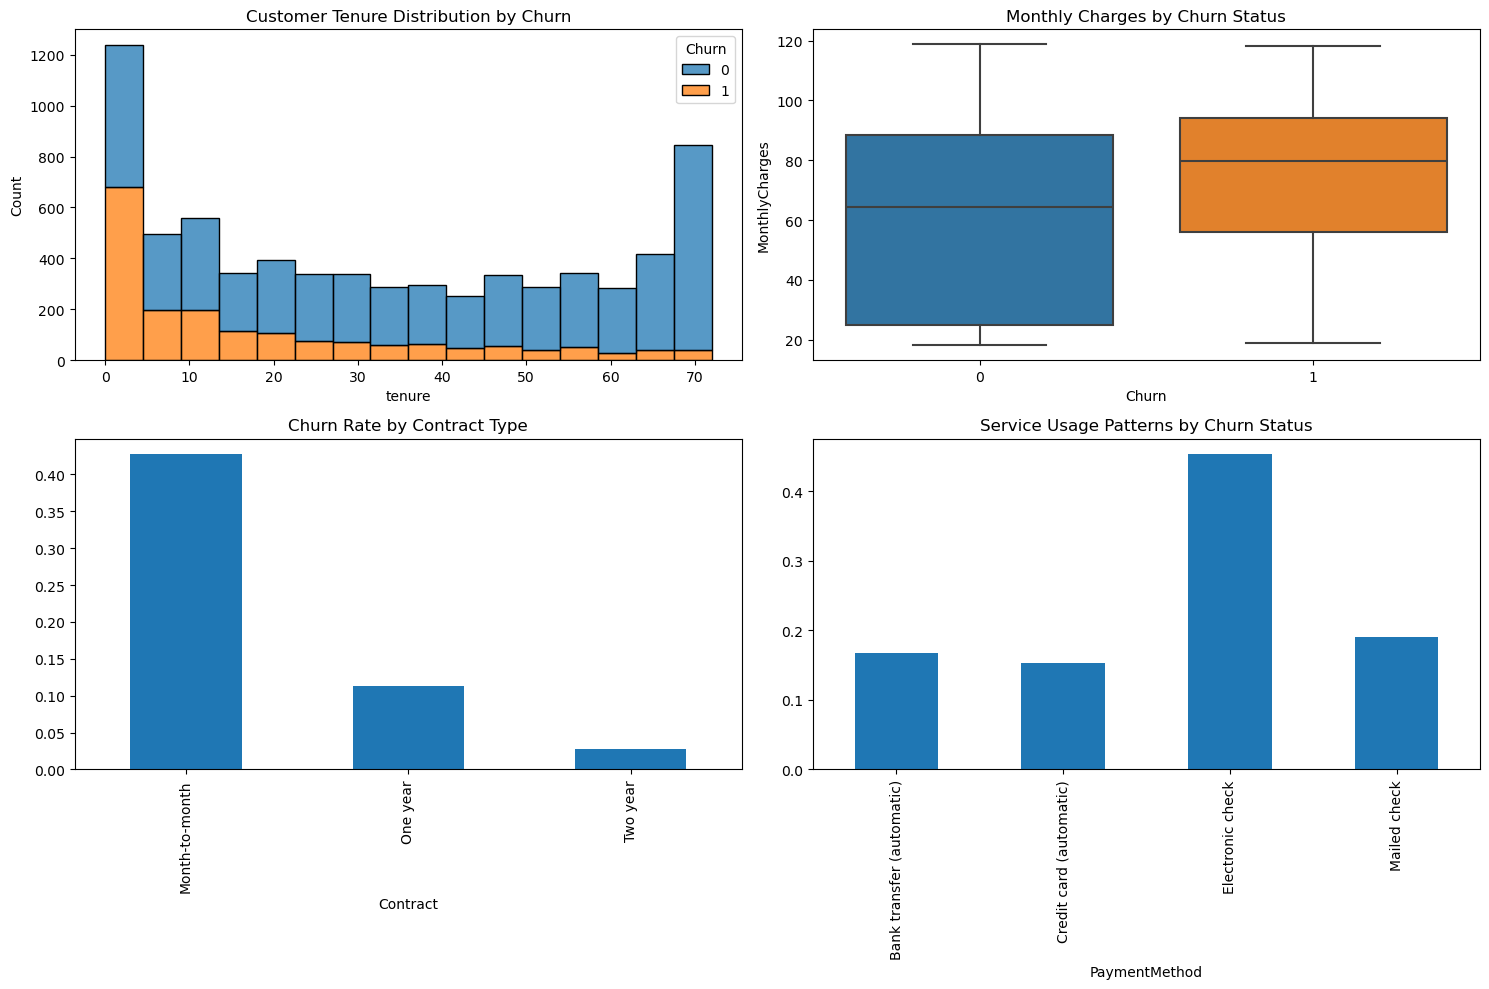

In [11]:
perform_eda(customer)

# Neural Network

In [12]:
def preparing_features(df):

    categorical_cols = df.select_dtypes(exclude=['number']).columns
    print(categorical_cols)
    df = pd.get_dummies(df, columns=categorical_cols, drop_first = True)

    Y = df["Churn"]
    X = df.drop(["Churn"],axis=1)
    

    # #Incrementate Data per 100
    # Y_t = np.tile(Y,(100,1))
    # X_t = np.tile(X,(100,1))

    # index = np.arange(len(X_t))
    # np.random.shuffle(index)

    # X = X_t[index]
    # Y = Y_t[index]

    
   # División directa en entrenamiento, validación y prueba
    X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
    X_CV, X_test, Y_CV, Y_TEST = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

    

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar con el conjunto de entrenamiento
    X_CV_scaled = scaler.transform(X_CV)  # Transformar conjunto de validación
    X_test_scaled = scaler.transform(X_test)  # Transformar conjunto de prueba
    

    # # Create preprocessing steps
    #     # numeric_transformer = Pipeline(steps=[
    #         ('scaler', StandardScaler())
    #     ])
        
    #     categorical_transformer = Pipeline(steps=[
    #         ('onehot', OneHotEncoder(drop='first', sparse=False))
    #     ])
        
    #     # Combine preprocessing steps
    #     preprocessor = ColumnTransformer(
    #         transformers=[
    #             ('num', numeric_transformer, numeric_features),
    #             ('cat', categorical_transformer, categorical_features)
    #         ])
    
    
    return X_train_scaled, X_CV_scaled, X_test_scaled, Y_train, Y_CV, Y_TEST
   
    
    

In [13]:
def train_model(X_train_scaled, X_CV_scaled,  Y_train, Y_CV):

    model = Sequential([
            Dense(64, activation="relu",kernel_regularizer=l1(0.0005)),
            Dense(64, activation="relu",kernel_regularizer=l1(0.0005)),
            Dense(1,  activation="sigmoid",kernel_regularizer=l1(0.0005))
    ])

    model.compile(
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=["accuracy"]
        
        
    )

    history = model.fit(X_train_scaled,Y_train, epochs=100 )
    # class_weight={0: 1, 1: 2}

    loss1,accuracy1 = model.evaluate(X_CV_scaled, Y_CV)

    print (f"Loss: {loss1}, Accuracy: {accuracy1}")

#     # Save the best model based on validation loss
# checkpoint_callback = ModelCheckpoint(
#     filepath="best_model.keras",  # File where the best model is saved
#     monitor="val_loss",           # Track validation loss
#     save_best_only=True,          # Save only if it's the best model
#     mode="min",                   # Save when loss decreases
#     verbose=1                     # Show when saving
# )

# # Train the model with validation data
# history = model.fit(
#     X_train_scaled, Y_train, 
#     epochs=100, 
#     validation_data=(X_CV_scaled, Y_CV),  # Required to track val_loss
#     callbacks=[checkpoint_callback]       # Add the checkpoint callback
# )

    Y_pred = model.predict(X_CV_scaled)
    Y_pred= (Y_pred>=0.4).astype(int)
    print(classification_report(Y_CV,Y_pred, target_names=["No Churn","Churn"]))

    return model

In [14]:
churn = customer_2[customer_2["Churn"]==1].head(200) 
customer_2 = pd.concat([customer_2]*4, ignore_index=True)
customer_2 = pd.concat([customer_2,churn],ignore_index=True)
customer_2 = customer_2.sample(frac=1, random_state=42).reset_index(drop=True)
a,b,c,d,e,f = preparing_features(customer_2)

Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')


In [15]:
model = train_model(a,b,d,e)

Epoch 1/100


C:\Users\luis\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\nn.py:750: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7736 - loss: 0.7274
Epoch 2/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8103 - loss: 0.5425
Epoch 3/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8134 - loss: 0.4849
Epoch 4/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8156 - loss: 0.4572
Epoch 5/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8099 - loss: 0.4524
Epoch 6/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8134 - loss: 0.4485
Epoch 7/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8089 - loss: 0.4439
Epoch 8/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8147 - loss: 0.4357
Epoch 9/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8151 - loss: 0.4311
Epoch 10/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8168 - loss: 0.4333
Epoch 11/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8214 - loss: 0.4245
Epoch 12/100
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [16]:
loss2,accuracy2 = model.evaluate(c,f)
    
    
print (f"Loss: {loss2}, Accuracy: {accuracy2}")

178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4227
Loss: 0.42357367277145386, Accuracy: 0.8059911727905273


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr_model = LogisticRegression(c=0.0005, penalty="l1") #Regularization Term
lr_model.fit(a,d)

TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'c'

In [ ]:
y_pred = lr_model.predict(b)
y_pred = (y_pred > 0.45).astype(int)
y_pred_2 = lr_model.predict(c)
y_pred_2 = (y_pred_2 > 0.45).astype(int)
print(f"prediction for CV:", y_pred)
print(len(c),len(f), len(y_pred_2))
print(f"Model Score.", lr_model.score(b,e))
print(f"Model Score.", lr_model.score(c,f))

In [ ]:
print(classification_report(y_pred,e, target_names=["No Churn","Churn"]))
print(classification_report(y_pred_2,f, target_names=["No Churn","Churn"]))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

RANDOM_STATE= 55 ## We will pass it to every sklearn call so we ensure reproducibility

In [ ]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

In [ ]:
best_accuracy_train = 0
best_accuracy_CV = 0
best_min_sample_train = 0
best_min_sample_CV = 0

accuracy_list_train = []
accuracy_list_CV = []

for min_sample in min_samples_split_list:

    model = DecisionTreeClassifier(min_samples_split = min_sample, random_state=RANDOM_STATE).fit(a,d)

    predictions_train = model.predict(a)
    predictions_cv = model.predict(b)

    accuracy_train= accuracy_score(predictions_train, d)
    accuracy_CV= accuracy_score(predictions_cv, e)

    accuracy_list_train.append(accuracy_train)
    accuracy_list_CV.append(accuracy_CV)

    if accuracy_train > best_accuracy_train:
        best_accuracy_train = accuracy_train;
        best_min_sample_train = min_sample

    if accuracy_CV > best_accuracy_CV:
        best_accuracy_CV = accuracy_CV;
        best_min_sample_CV = min_sample

print(f"best for Train:",  best_accuracy_train, best_min_sample_train)
print(f"best for CV:",  best_accuracy_CV, best_min_sample_CV)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_CV)
plt.legend(['Train','Validation'])

In [ ]:
best_accuracy_train = 0
best_accuracy_CV = 0
best_min_sample_train = 0
best_min_sample_CV = 0

accuracy_list_train = []
accuracy_list_CV = []
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth = max_depth, random_state=RANDOM_STATE).fit(a,d)

    predictions_train = model.predict(a)
    predictions_cv = model.predict(b)

    accuracy_train= accuracy_score(predictions_train, d)
    accuracy_CV= accuracy_score(predictions_cv, e)

    accuracy_list_train.append(accuracy_train)
    accuracy_list_CV.append(accuracy_CV)

    if accuracy_train > best_accuracy_train:
        best_accuracy_train = accuracy_train;
        best_min_sample_train = max_depth

    if accuracy_CV > best_accuracy_CV:
        best_accuracy_CV = accuracy_CV;
        best_min_sample_CV = max_depth

print(f"best for Train:",  best_accuracy_train, best_min_sample_train)
print(f"best for CV:",  best_accuracy_CV, best_min_sample_CV)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_CV)
plt.legend(['Train','Validation'])

In [ ]:
decision_tree_model = DecisionTreeClassifier(min_samples_split=10, max_depth=32,random_state=RANDOM_STATE).fit(a,d)
print(f"Score for Training:", accuracy_score(decision_tree_model.predict(a),d))
print(f"Score for Validation:", accuracy_score(decision_tree_model.predict(b),e))
print(f"Score for Test:", accuracy_score(decision_tree_model.predict(c),f))